<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/neuralnets/Perceptron_scikit_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch=0, accuracy=0.75, loss=0.591126125857727
epoch=1, accuracy=0.993, loss=0.4645589483706298
epoch=2, accuracy=0.998, loss=0.37276281639779113
epoch=3, accuracy=0.998, loss=0.37276281639779113


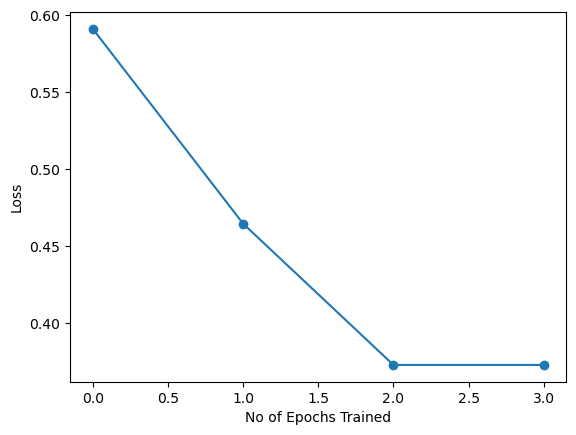

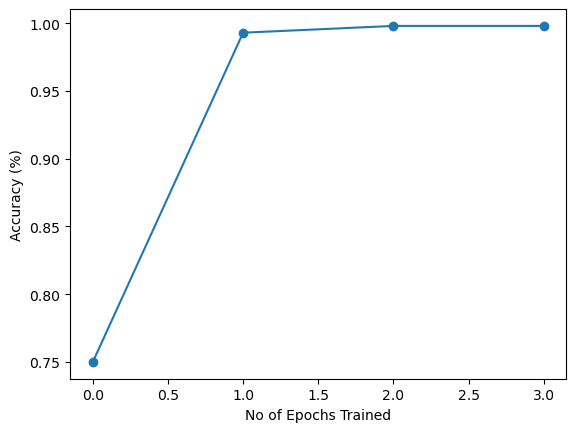

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.utils import shuffle

# Generate synthetic data
d = 2  # number of dimensions
n_samples = 100
cluster_std = 0.1
mean0 = [0, 0]
mean1 = [1, 0]
mean2 = [1, 1]
mean3 = [0, 1]
pos_class = 2  # which center is positive?

data, target = make_blobs(n_samples=n_samples, n_features=2,
      centers=[mean0, mean1, mean2, mean3], cluster_std=cluster_std, random_state=10)

test_data, test_target = make_blobs(n_samples=1000, n_features=2,
      centers=[mean0, mean1, mean2, mean3], cluster_std=cluster_std, random_state=20)

# Map target values to binary (0 or 1)
target = (target == pos_class).astype(int)
test_target = (test_target == pos_class).astype(int)

# Linear perceptron using scikit-learn
Nepochs = 50

#random_state of 288 and 23 with learning rate 0.1 show very different initial behavior.
clf = SGDClassifier(random_state=23, eta0=1e-1, learning_rate='constant', loss='log_loss', penalty=None, warm_start=True)

# Initialize variables for storing progress
accuracies = []
losses = []

for epoch in range(Nepochs + 2):
    # Fit the model
    if epoch == 0:
        # Shuffle the data to randomize the order
        shuffled_data = shuffle(data)
        clf.partial_fit(shuffled_data, target, classes = [0, 1])
    elif epoch == Nepochs+1:
        pass
    else:
        clf.partial_fit(data, target)

    # Accuracy
    predictions = clf.predict(test_data)  #validation
    accuracy = accuracy_score(test_target, predictions)
    accuracies.append(accuracy)

    # Calculate log loss (cross-entropy) based on predicted class probabilities
    predicted_probabilities = clf.predict_proba(test_data)
    loss = log_loss(test_target, predicted_probabilities)
    losses.append(loss)

    print(f'{epoch=}, {accuracy=}, {loss=}')

plt.figure()
plt.plot(range(Nepochs + 2), losses, marker='o')
plt.xlabel('No of Epochs Trained')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(range(Nepochs + 2), accuracies, marker='o')
plt.xlabel('No of Epochs Trained')
plt.ylabel('Accuracy (%)')
plt.show()
